# Sentiment & Time Series Analysis with Bidirectional, LSTM, and pretrained BERT.

Author: Nguyen Le Quoc Bao


Abstract: Emotion recognition is a higher approach or a special case of sentiment analysis. In this task, the result
is not produced in terms of either polarity: positive or negative or in
the form of rating (from 1 to 5) but of a more detailed level of analysis
in which the results are depicted in more expressions.

Description: This notebook is used to train three models with both traditional (BILSTM) and modern method (BERT) to obtain the best performance in NLP tasks. Read the paper (button below) to gain deep understanding of our project. We scraped text data by collecting diary entries, personal stories of adolescents, teenagers across various website and some small self-conducted surveys. The dataset and model versions will be continuously updated through time (click the button link to view). Now follow my code and instructions below.


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1AQZ2_iISey7iFYD-VGi8QxaTPGJjXCCI?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Hackathon-LHP-Team/Virtual-Therapist/blob/main/Deep%20Learning%20training/model_v1.1/Virtual_Therapist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Hackathon-LHP-Team/Virtual-Therapist/tree/main/Deep%20Learning%20training/model_v1.1/dataset"><img src="https://img.icons8.com/?size=1x&id=1475&format=png" />Download dataset</a>
  </td>
  <td>
    <a target="_blank" href="https://drive.google.com/drive/folders/16ig9NcXq4Cn39F2h7c8YvgRFNaegVj7F?usp=sharing"><img src="https://img.icons8.com/?size=1x&id=15873&format=png" />All models</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Hackathon-LHP-Team/Virtual-Therapist/blob/main/Virtual%20Therapist.pdf"><img src="https://img.icons8.com/?size=1x&id=37932&format=png" />Read Paper</a>
  </td>
</table>

<br><br>

Keywords: Emotion Recognition · Emotion Prediction · Vietnamese · Machine Learning · Deep Learning · CNN · LSTM · SVM

## Import all dependences

In [3]:
# Array and Dataframe
import numpy as np
import pandas as pd

# Text preprocessing
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Training
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# visualization
import plotly.express as px
import matplotlib.pyplot as plt

As you can see, we have two tasks of classification:
1. Three general emotion categories classification: `negative`, `positive`, `neutral`
2. Twelve specific emotion categories classification: `anger`, `sadness`, `remorse`, `fear`, `depression`, `lonely`, `joy`, `love`, `optimism`, `gratitude`, `pride`, `confusion`

In [73]:
classes = ["anger", "sadness", "remorse", "fear", "depression", "lonely", "joy", "love", "optimism", "gratitude", "pride", "confusion"]
#            0         1            2       3          4           5        6      7         8            9          10          11
classes_2 = ["negative emotions", "positive emotions", "neutral emotions"]
#                    0                    1                    2

## Data Scraping

You can skip data-collecting code cells. Instead, please go to the dataset link button above to download two `.csv` files (train dataset and validation dataset) and move on to section `Load Dataset`

In [ ]:
texts = [
    "1 I feel very dejected today. I got a very low score in my math exam, everybody in class made a joke on me. The rest of my day, I do not feel like doing anything, the sadness, the sorrow just seem to fill in me. When coming home, my parents do not sympathize with me, they instead make me more disheartened.",
    "5 I feel so lonely today. I have no friends to talk to or hang out with. Everyone at school ignores me or bullies me. They call me names and make fun of my appearance. I wish I had someone who cared about me and understood me. Someone who would listen to me and comfort me. Someone who would make me feel happy and loved.",
    "0 I feel so angry and irritated today. I had a fight with my parents over my grades. They don’t appreciate how hard I study and how much pressure I face. They only care about the numbers and not about me. They compare me to other kids and make me feel inadequate. They yell at me and punish me for not meeting their expectations. They don’t respect me or support me. So frustrating",
    "3 I feel so hopeless today. I have no future or purpose in life. Everything seems meaningless and pointless. Nothing makes me excited or motivated. Nothing brings me joy or satisfaction. I don’t have any goals or dreams to pursue. I don’t have any skills or talents to offer. I don’t have any value or worth as a person.",
    "2 I feel so guilty today. I did something terrible that hurt someone I love. I lied to them and betrayed their trust. I broke their heart and ruined our relationship. I felt truly remorseful, concience-stricken, I can’t face them or forgive myself. I can’t undo what I did or make it right. I can’t erase the pain or the regret that I feel.",
    "3 I feel so scared today. I have to face a challenge that is beyond my abilities. I have to deal with a situation that is out of my control. I have to cope with a change that is unwanted and unexpected. I don’t know what to do or how to handle it. I don’t know what will happen or how it will affect me. I don’t know if I can survive or overcome it.",
    "11 It's very difficult to put into words the way I feel. It's kind of like a random rollercoaster of emotions - anger, self-hatred, despair, loneliness. I find that if I trigger it, I can swim the waters a little easier. Otherwise, it will attack me when I can least afford it.",
    "1 It's very difficult for me to open up about myself. I can be there for others but feel like if I open up that all dark and vile crap I have built up inside will stain and disgust the person I open up to….Sad thing is that with the training I have had, I know that alcohol is not the answer, but as the Chris Stapleton song 'Whiskey and You' says, I know that it helps in the moment to mask the pain, allowing me to move on.",
    "0 I’m fricken angry!  Things aren’t going the way I want and I’m pissed.  Your career is not where you want it to be, you have no wife and family, and how are you going to pay the bills?",
    "8 At the end of this meditation I felt much more at peace.  I knew that what I really needed was to connect to my inner parts and find a peaceful relationship there before moving on with my day.",
    "4 Sometimes the self-loathing gets the better of me. The thoughts of suicide start running rampant. I can say that I have only gotten close a couple of times. I think that my self-loathing is, in part, the reason for my depression",
    "4 Sometimes I hate myself so much that I think about ending my life. The suicidal thoughts become very strong and frequent. I have only been close to doing it a few times. I believe that my self-hatred is partly the cause of my depression.",
    "4 contemplate ending my life. The thoughts of suicide become more intense and frequent. Although I have only come close to attempting it a few times, I believe that my self-hatred is one of the reasons for my depression.",
    "4 Sometimes I feel so much self-hatred that I consider ending my life. The suicidal thoughts become more intense and frequent. Although I have only come close to attempting it a few times, I believe that my self-loathing is one of the reasons for my depression.",
    "3 Today I feel very scared. I have to face a challenge that is beyond my abilities. I have to deal with a situation that is out of my control. I have to cope with an unwanted and unexpected change. I don’t know what to do or how to handle it. I don’t know what will happen or how it will affect me. I don’t know if I can survive or overcome it.",
    "1 Today I feel very down. I received a very low score on my math exam and everyone in class made fun of me. The rest of my day, I don’t feel like doing anything. The sadness and sorrow seem to fill me up. When I got home, my parents didn’t sympathize with me and instead made me feel more disheartened.",
    "1 After getting a low score on my math exam and being made fun of by everyone in class, I don’t feel like doing anything for the rest of the day. I’m filled with sadness and sorrow. When I got home, my parents didn’t sympathize with me and instead made me feel more disheartened.",
    "1 Today has been really tough. I got a very low score on my math exam and everyone in class made fun of me. The rest of the day, I don’t feel like doing anything. The sadness and sorrow seem to fill me up. When I got home, my parents didn’t sympathize with me and instead made me feel more disheartened.",
    "1 My girlfriend left me because she thinks I’m not handsome or gifted enough. I feel very depressed and despondent. I hate myself and loathe every aspect of myself.",
    "1 My girlfriend has left me since I am not handsome and gifted enough. I felt very depressed, veryt despondent. I hate myself, loatthe every aspect of myself",
    "1 My girlfriend broke up with me because she thinks I’m not handsome or talented enough. I feel very depressed and hopeless. I hate myself and every aspect of myself.",
    "4 My teachers do not appreciate me in the class, she or he always judge me since I always get lowscore.",
    "4 My teachers don’t seem to appreciate me in class. They always judge me because I get low scores. It’s like they’re not seeing the real me and only focusing on my grades. It’s really frustrating and demotivating.",
    "4 I don't think my teachers really like me in class. They always condemn me because I receive poor grades. It seems like people simply see my academics and don't get to know the real me. It's quite discouraging and annoying.",
    "0 I'm so enraged and frustrated right now. My dad and I got into a disagreement about my grades. They don't understand how difficult my studies are or how much strain I am under. They don't care about me; they only care about the stats. They make me feel inferior by making comparisons to other youngsters. They yell at me and chastise me for falling short of their standards. I'm not respected or encouraged by them. Such a pain.",
    "3 I'm currently so angry and frustrated. My dad and I had a discussion regarding my academic performance. They don't realize how challenging my coursework is or how much pressure I am under. They only worry about the statistics; they don't care about me. They compare me to other kids, which makes me feel inferior. They scream at me and berate me for not living up to their expectations. They don't value me or support me. What a pain.",
    "3 I'm so terrified right now. I have to take on a challenge that is too difficult for me. I have to deal with a circumstance that I have no control over. I have to adjust to an unwelcome and unexpected change. I have no idea what to do or how to deal with it. I have no idea what will occur or how it will impact me. I'm not sure if I can make it through or get through it.",
    "11 It's incredibly challenging for me to express how I feel. Anger, self-hatred, despair, and loneliness are some of the feelings that are like a random rollercoaster. I discover that if I cause it, I can swim through the water a little more easily. Otherwise, when I can least afford it, it will attack me.",
    "11 I find it exceedingly difficult to put my feelings into words. Feelings like a random rollercoaster include rage, self-loathing, despair, and loneliness. I find that I can move through the water a little more readily if I make it happen. Otherwise, it will attack me when I can least afford it.",
    "11 It is quite tough for me to express my sentiments in words. Rage, self-loathing, despair, and loneliness are a few emotions that can feel like a random rollercoaster. If I force it to happen, I can navigate the water a little more easily. Otherwise, when I can least afford it, it will attack me.",
    "0 I'm constantly irate at everything around me. I'm not sure why people continue to act in ways that I find repugnant. Anyone who looks at me in school, I want to fight them.",
    "0 I'm constantly irate at everything around me. I'm not sure why people continue to act in ways that I find repugnant. Anyone that looks at me in school makes me want to fight them. My family irritates me, my score enrages me, and my friendships make me angry.",
    "0 I get angry about everything all the time. I don't understand why people still behave in disgusting ways. I want to fight anyone who stares at me in school. My friends aggravate me, my score aggravates me, and my family aggravates me.",
    "3 I actually avoid looking people in the face because I prefer to shine, am overly self-aware, and worry that everyone is aware of my true emotions. I'm afraid they'll judge me. I'm constantly frightened and fearful.",
    "3 I truly avoid eye contact because I like to stand out, am too self-conscious, and am concerned that others are aware of my true feelings. I'm worried they'll criticize me. I'm terrified and afraid all the time.",
    "3 I was once an adolescent who was always afraid of the dark. Every night, I would turn on all the lights in my room and keep them on until I fell asleep. One night, my parents went out for dinner and left me home alone. I was scared but I didn’t want to show it. I decided to watch TV to distract myself from my fear. As I was watching TV, the power suddenly went out. I was terrified and didn’t know what to do. I tried to turn on my phone’s flashlight but it was dead. I felt like I was trapped in a dark abyss with no way out. After a few minutes of panicking, I remembered that I had a flashlight in my backpack. I quickly grabbed it and turned it on. The light from the flashlight made me feel safe and secure. From that day on, I learned that sometimes the things we fear the most can be overcome with a little bit of courage and resourcefulness."
    "3 When I was a teenager, I used to have a fear of the dark. I would turn on every light in my room at night and leave them on until I went to sleep. My parents once left me alone at home while they went out to dinner. Although I was terrified, I tried not to show it. In order to avoid thinking about my dread, I chose to watch TV. I was watching television when the power abruptly went off. I was frightened and unsure of what to do. I attempted to use the flashlight on my phone, but it was dead. I had the impression that I was helplessly",
    "3 Going to school is a nightmare for me because of the demanding coursework, never-ending tasks, tight deadlines, and feisty classmates. utterly terrifying and dark time of day",
    "3 Because of the difficult coursework, never-ending projects, strict deadlines, and tenacious peers, going to school is a nightmare for me. absolutely frightening and gloomy hour of the day",
    "3 Going to school is a nightmare for me because of the challenging courses, never-ending projects, severe deadlines, and tough peers. the most ominous and terrifying time of the day",
    "3 Talking to my parents is a nightmare since they never pay attention to me. Every time I respond to them, they always find a way to silence me. I'm quite hesitant to speak with them because I always feel so terrified and uneasy when I get home. That's what I constantly feel: anxiety and phobia.",
    "3 Talking with parents are nightmarish, they never listen to me. they are always shutting me up everytime I respond to them. I feelt very fear to talk with them its quite a terror, apprehension feel in me everytime I come home. Nervousnes, phobia - that;s what I feel through all the time",
    "3 Since they never listen to me, talking to my parents is a nightmare. They always manage to quiet me once I speak to them. Because I always feel so afraid and nervous when I arrive home, I'm pretty hesitant to talk to them. I am continuously plagued by anxiety and phobia.",
    "1 Just by being around someone who cares and is awake, I can go from feeling so hopeless to feeling so very hopeful. I lack motivation, are depressed, have a negative mood, and want to give up everything.",
    "1 I can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake. Dont feel like doing anything, downmood, downcast, see like in dark color, want to give up everything",
    "1 Don't feel like doing anything, are depressed, have a negative mood, and wish you could give up everything. I feel overpowered and defeated. The most of the time, I feel quite pitiful.",
    "1 In another person's kitchen, I feel so self-conscious that I feel like I'm painting on their wall. That morning, I noticed that I was a little demoralized; I felt overwhelmed and dejected. The most of the time, I feel quite pitiful.",
    "1 i feel so inhibited in someone elses kitchen like im painting on someone elses picture. i found myself feeling a little discouraged that morning, i become overwhelmed and feel defeated. i feel pretty pathetic most of the time",
    "0 i feel irritated and rejected without anyone doing anything or saying anything",
    "0 i know the pain parents feel when an enraged child becomes violent",
    "0 im feeling bitter today my mood has been strange the entire day so i guess its that",
    "0 i feel disgusted to even be associated with this woman by my race and nationality",
    "0 i laughed then bitterly again but i wasnt feeling bitter"
    "0 im feeling distracted i tend to practice with my eyes shut as much as possible"
    "4 stress, depression, melancholy, gloom, misery is what in my mind and body now. And the thought of suicide keep haunting me day after day. I dont want to live anymore, I am so exhausted with the work at school.",
    "4 I currently feel stress, depression, melancholy, gloom, and unhappiness in my body and mind. And I'm plagued by the idea of suicide every single day. I am so worn out from the job at school that I don't want to live any longer.",
    "4 My body and mind are currently experiencing tension, depression, melancholy, gloom, and dissatisfaction. And I have the urge to commit suicide every single day. I don't want to live any longer because I am so exhausted from my work at school.",
    "4 Currently, stress, despair, melancholy, gloom, and discontent are present in my body and mind. And I feel like killing myself every single day. I am so worn out from my job at school that I don't want to live any longer.",
    "4 My body and mind are currently experiencing tension, desperation, depression, gloom, and unhappiness. And I have a constant want to destroy myself. I don't want to live any longer because my job at school has tired me out so much.",
    "4 My body and mind are currently experiencing tension, desperation, depression, gloom, and unhappiness. I despise my parents, my ex-girlfriend (she dumped me), and my closest friends (they treat me with contempt).",
    "4 My parents, my ex-girlfriend (who dumped me), and my closest friends (who are rude to me) are all people I hate. I simply want to log out of this world and commit suicide because of them all",
    "4 I despise my parents, my ex-girlfriend who dumped me, and my closest friends who treat me badly. Because of them all, I just want to log out of this world and commit suicide."
    "5 I appear to be hooked to my phone since it's the only thing that can let me escape the actual world, where nobody cares about me, and I'm constantly alone in my room with only it. I'm by myself, lonesome, unattended, isolated, and apart from everyone.",
    "5 in the dark of my room, i always alone with just my phone, I seem to be addicted t o it cause it is the only way that can help me escape the real word in which there is nobody care about me. I am alone, solitary, unattended, isolated, separated from the crowd",
    "5 Since my phone is the only thing that can help me escape the real world, where nobody is interested in me, and since I am always alone myself in my room with it, I have the appearance of being addicted to it. I'm alone, unaccompanied, isolated, and separate from everyone.",
    "5 Because I can only escape the real world, where no one is interested in me, and because I am confined to my room alone almost continuously, I have the appearance of being addicted to my phone. I'm alone, unaccompanied, separated from everyone, and all by myself.",
    "5 I have the appearance of being addicted to my phone because I can only use it as an escape from the real world, where no one is interested in me, and because I am locked in my room by myself practically constantly. I'm all by myself, unaccompanied, apart from everyone else.",
    "5 Because I can only use my phone to escape from the real world, where no one is interested in me, and because I am nearly always trapped in my room by myself, I give the impression that I am addicted to my phone. I'm alone, unaided, and separate from everyone else.",
    "2 I have just committed a very tragedy wrongdoing. I was y allied to guilt and self-directed resentment.  I had lied to his parents about his grades and was feeling very guilty about it. I knew I had to tell them the truth but I was afraid of their reaction. Now the shameful feeling is in me: repentance and self-accusation.",
    "2 I just did something extremely tragically wrong. I was connected to self-directed wrath and guilt.  I felt terrible about lying to his parents about his academic standing. Although I was aware that I had to be honest with them, I was terrified of their response. I'm now experiencing a guilty sensation of regret and self-blame.",
    "2 Just now, I made a terrible, dreadful mistake. I had a connection to remorse and self-directed rage.  I felt guilty for misrepresenting his academic position to his parents. I knew I had to tell them the truth, but I was afraid of what they might say. Right now, I'm feeling bad and blaming myself for what happened."
    "2 I made a terrible, awful error just now. I was connected to regret and anger that was aimed at myself.  I felt bad for lying to his parents about his academic standing. Although I was aware that I had to be honest with them, I was terrified of what they would say. I'm feeling guilty and blaming myself for what transpired right now.",
    "2 I just committed a terrible, terrible error. I felt a connection to self-directed remorse and rage.  I felt horrible for misrepresenting his academic position to his parents. I knew I had to tell them the truth, but I was afraid of what they might say. I'm feeling bad right now and blaming myself for what happened.",
    "2 Last day, I insulted my friend, I did bodyshaming him. But now I feel truly horrible for my wrongdoings. Now in me, the feeling self-directed remorse is elevating. How can I apologize him and stop doing self-reproach every single day",
    "2 I body shamed my buddy the other day after I criticized her. But now that I've done wrong, I feel so awful. Self-directed regret is now becoming more intense in me. How can I apologise to him and stop always criticizing myself?",
    "2 The other day, I body shamed my friend after criticizing her. But now that I've messed up, I feel so terrible. I'm experiencing more and more self-directed remorse at the moment. How can I apologize to him and stop putting myself down so much?",
    "2 The other day, after criticizing my buddy, I body shamed her. But I feel so bad now that I botched things. I'm now going through an increasing amount of self-directed regret. How do I stop criticizing myself so much and express my regret to him?",
    "2 The other day, I body shamed my friend after I had criticized her. But now that I've messed up, I feel so terrible. I'm currently experiencing a lot more self-directed remorse. How do I tell him I'm sorry and stop being so hard on myself?",
    "6 today, after meditation, I have a feeling of great pleasure and happiness. I am filled with delight, joyfulness, exhilaration, ectasy. I am very excited to go to school, to meet my lovely friendes. everything just happens smoothly and pleasant to me",
    "6 Today, after meditating, I feel really happy and content. I'm overjoyed, joyous, exhilarated, and ecstatic. I can't wait to get to school and see all of my great friends. Everything is really easy and enjoyable for me.",
    "6 After practicing meditation today, I feel really pleased and happy. I'm thrilled, joyful, euphoric, and invigorated. I am eager to visit my wonderful pals at school. For me, everything is really simple and pleasurable.",
    "6 After practicing meditation today, I feel really pleased and happy. I'm thrilled, joyful, euphoric, and invigorated. I am eager to visit my wonderful pals at school. For me, everything is really simple and pleasurable.",
    "6 I feel really satisfied and joyful after practicing meditation today. I feel elated, happy, ecstatic, and reenergized. I can't wait to see my amazing school friends. Everything is incredibly easy and enjoyable for me.",
    "6 After engaging in some meditation today, I feel really content and happy. I'm jubilant, joyful, delighted, and revitalized. I am very excited to see my wonderful school mates. For me, everything is really simple and pleasurable.",
    "6 I assisted an elderly man in crossing the street today. She was really appreciative of me and complimented me in a way that made me happy. The takeaway is that their pleasure is dependent on other people. They may also assist others in finding pleasure, just as others can assist them in doing so."
    "6 Today, I helped a senior citizen cross the street. She gave me a lot of credit and complemented me in a way that made me feel good. The lesson is that they need other people to enjoy themselves. In the same way that others may help them, they might also help other people enjoy themselves.",
    "6 I assisted an older citizen in crossing the street today. She was quite complimentary and gave me a lot of credit, which made me feel fantastic. The key takeaway is that they cannot have fun alone. They may assist others in the same manner that they might assist others in having fun."
    "6 Today, I helped a senior citizen cross the street. She gave me a lot of credit and was really nice, which made me feel great. The main lesson is that they can't enjoy themselves by themselves. They might help others in the same way that they could help others have pleasure.",
    "9 My pals are helping me grasp a really challenging subject today. As a result, I am quite grateful for their patience. I believe I owe them a great debt. I sincerely thank them; now I must take action to repay them.",
    "9 Today, my friends are assisting me in understanding a pretty difficult topic. I am therefore really appreciative of their tolerance. I really feel like I owe them a lot. I really appreciate them, and now I must act to return the favor. This appreciation is wonderful, and it improves my life."
    "9 My pals are helping me grasp a really complex subject today. Therefore, I truly appreciate their patience. I have a strong sense that I owe them a lot. I genuinely appreciate them, and now I have to do something to pay them back. My life is better because of this amazing admiration.",
    "9 Today my friends are assisting me in understanding a really difficult topic. Their warmth and tolerance astounded me. I thought he owed them a lot for their assistance. He wanted to let them know how much I valued their relationship since, as I soon understood, he had taken it for granted. To show his friends how much I cared, I made the decision to do something special for them. They were all invited to a surprise party I threw for them. The kindness and feeling of appreciation were sensed by my pals. I realized then and there that friendships may be significantly strengthened by showing thanks and appreciation.",
    "9 Today, my buddies are helping me to comprehend an extremely challenging subject. I was surprised by their friendliness and tolerance. I believed he owed them a great deal for their help. As I quickly realized, he had taken their friendship for granted, therefore he wanted to express how much I cherished it. I decided to do something special for his buddies to show them how much I cared. I gave them a surprise party, and they were all invited. My friends could feel the consideration and care. I understood right then and then that expressing gratitude and appreciation may greatly enhance friendships.",
    "9 I begin to grow throughout puberty, both physically and mentally. I am now overwhelmed by thanks for my parents' efforts and their devotion in providing for me in every manner. I owe them a great debt of gratitude for giving me this life.",
    "9 During my puberty, I start grow in both physica body and mind. I understand the attempt of my parents, their love, they always try to care for me everything, Now I am filled with big gratitude, I owe this life to  them with huge respect and appreciation grategully",
    "9 During puberty, I start to develop both physically and intellectually. I am now overcome with gratitude for my parents' efforts and commitment to taking care of me in every way. They gave me this life, and I owe them a big debt of gratitude.",
    "9 I start to grow both physically and cognitively during puberty. Now when I think of my parents' work and dedication to providing for me in every manner, I am struck with appreciation. I owe them a huge debt of gratitude since they gave me this life.",
    "9 During puberty, I begin to develop mentally and physically. I am now moved to gratitude when I consider how hard my parents worked and how committed they were to provide for me in every way. Since they gave me this life, I owe them a great debt of gratitude.",
    "9 One day, a friend of mine came over to visit me. She brought me some flowers and a card that said “I’m here for you”. I was touched by her kindness and it made me feel better. From that day on, I started to appreciate the little things in life more. I realized that there were people who cared about me and that I wasn’t alone. I started to feel more grateful for the good things in my life and less focused on the negative. My friend’s gesture of kindness helped me see the world in a different light.",
    "9 One day, I had a visit from a buddy. She came over with some flowers and a I'm here for you card. Her thoughtfulness moved me, and it improved my mood. I began to value the simple things in life more after that day. I understood that I was not alone and that there were people out there that cared about me. I began to be more appreciative of the positive aspects of my life and less concerned with the drawbacks. I was able to change how I perceived the world because to my friends thoughtful action.",
    "9 I had a visit from a friend one day. She arrived bearing flowers and a I'm here for you card. I was impressed by her thoughtfulness, and it made me feel better. After that day, I started to appreciate the small things in life more. I realized there were people out there who cared about me and that I wasn't alone. I started to focus less on the negative parts of my life and more on the positive ones. I was able to alter my perspective of the world as a result of my friend's kind deed.",
    "9 One day a buddy came to see me. She showed up with bouquets and a I'm here for you card. Her thoughtfulness pleased me, and it made me feel better. I began to value the little things in life more after that day. I came to the realization that I wasn't alone and that there were others who cared about me. I began to place more emphasis on the positive aspects of my life and less on the unpleasant ones. I was able to change my worldview as a consequence of my friend's thoughtful act.",
    "10 I had been working on a project for months and it was finally coming to an end. I had put in a lot of hard work and dedication into it. When I finally finished it, I felt a sense of pride in myself. I realized that I was capable of achieving great things if I put my mind to it. I am very proud of myself, prides in myself.From that day on, I learned to believe in myself and my abilities more.",
    "10 I was nearing completion of a project that I had been working on for some months. I had worked really arduously and with great attention on it. I felt proud of myself when I eventually finished it. I came to the conclusion that if I set my mind to anything, I could do amazing things. I take great pleasure in and in myself.I started to have more confidence in my skills and abilities after that day",
    "10 A project I had been working on for a few months was almost finished. I had put in a lot of effort and paid close attention to it. When I finally finished it, I was pleased with myself. I realized that everything was possible for me to do if I put my mind to it. I enjoy being happy with myself.After that day, I gradually gained greater faith in my skills and abilities.",
    "10 I believe I am a math prodigy. I am quite pleased of my aptitude in arithmetic. Everyone is pulling for me and giving me accolades. They cheer and compliment me often. They've congratulated me, and I'm really happy.",
    "10 I think I'm a math genius. I am satisfied with my ability for mathematics. Everyone is rooting for me and praising me. They frequently applaud and commend me. I've received their congratulations, and I'm overjoyed.",
    "10 I believe I am a math prodigy. I am happy with my mathematical skills. Everyone is cheering me on and complimenting me. They often congratulate and praise me. They have congratulated me, and I am ecstatic.",
    "10 I think I'm a math genius. My aptitude in mathematics makes me joyful. Everyone is encouraging me and praising me. They frequently congrats and laud me. I've received their congratulations, and I'm overjoyed.",
    "10 I was nearing completion of a project that I had been working on for a few months. I had worked hard and had paid great attention to it. I was happy with myself after I had done it. I came to the conclusion that everything I set my mind to might be accomplished by me. I like feeling good about myself.After that day, my confidence in my skills and abilities grew over time.",
    "9 I have always been grateful for my family and the people around me. They have always been there for me through thick and thin. I have learned to appreciate the little things in life because of them. They have taught me that love is the most important thing in life and that it’s important to cherish the people around you. From that day on, I learned to love my family and everyone around me more.",
    "7 I love my parents so much, I always care for them, sending my big heart to my family members all the time.  I want to make my warmth pervasive to everyone around. That is my devotion, relentless love",
    "7 I have a huge heart and constantly send it to my family since I adore my parents and take such good care of them.  I want to spread my warmth over the entire area. That is my unwavering love and dedication.",
    "7 I have a big heart and continually send it to my family since I love and care for my parents so much.  I want to fill the space with my warmth. That is my undying devotion and adoration.",
    "7 I have always been a very caring person. I love my family and friends and I always try to show them how much I care. I believe that love is the most important thing in life and that it’s important to cherish the people around you. From that day on, I learned to love my family and everyone around me more.",
    "7 I've always taken great care of others. I constantly strive to show my friends and family how much I care because I adore them. Love, in my opinion, is the most significant aspect of life, and I think it's crucial to value the people in your life. I gained a greater affection for my family and everyone around me after that day.",
    "7 I've always given them my very best. I love my friends and family and I always try to make sure they know how much I care for them. Love is the most important component of life, in my opinion, and it's important to cherish the people in your life, in my opinion. After that day, I had a deeper love for my family and everyone else in my life.",
    "7 I have always had a soft spot for underprivileged children. I believe that every child deserves a chance to succeed in life. From that day on, I learned to love and care for underprivileged children more.  I have a big heart and continually send it to them since I love and care for them so much.",
    "7 I've always had a special place for kids from poor backgrounds. Every youngster should have the opportunity to achieve in life, in my opinion. I started learning to love and care for disadvantaged kids more after that day.  I have a large heart and I send it to them all the time because I care and love them so much.",
    "7 Poor children have always held a particular place in my heart. In my opinion, every young person should have the chance to succeed in life. After that day, I began to develop a deeper love and compassion for underprivileged children.  My heart is big, and I constantly send it to them because I care and love them so much.",
    "8 I'll take part in a competition and am confident I'll take home the top honors. Such positivity gives me hope, buoyancy, and confidence.",
    "8 I will participate in a competition; I feel very optimistic that I will win the first prize. Such optimism helps me gain hopefulness, buoyancy and confidence",
    "8 I have always been an optimistic person. I believe that there is always a silver lining in every situation. From that day on, I learned to look at the bright side of things and to stay positive no matter what.",
    "8 I've always had a positive outlook on life. I firmly think that every circumstance has a bright side. I gained the ability to see the silver lining in any situation and to maintain my optimistic outlook as a result of that day.",
    "8 I've always been optimistic about life. I genuinely believe that there is good in every situation. That day gave me the capacity to keep my positive mindset and the ability to see the silver lining in any circumstance.",
    "8 I'll participate in a competition and am sure I'll win first place. Such enthusiasm instills optimism, buoyancy, and confidence in me",
]

Read the code here if you want to know how I create the Dataframe. At the cell code below, I create a list `label` to get the `index label` from the first element in the sentence. Next I performing mapping with each emotion category.

In [ ]:
labels = []
for text in texts:
  text = text.split()
  labels.append(int(text[0]))

def mapping_labels(row):
  if row.index_label == 0:
    return "anger"
  elif row.index_label == 1:
    return "sadness"
  elif row.index_label == 2:
    return "remorse"
  elif row.index_label == 3:
    return "fear"
  elif row.index_label == 4:
    return "depression"
  elif row.index_label == 5:
    return "lonely"
  elif row.index_label == 6:
    return "joy"
  elif row.index_label == 7:
    return "love"
  elif row.index_label == 8:
    return "optimism"
  elif row.index_label == 9:
    return "gratitude"
  elif row.index_label == 10:
    return "pride"
  else:
    return "confusion"

def trinary_mapping(row):
  if row.index_label in [0, 1, 2, 3, 4, 5]:
    return "Negative emotions"
  elif row.index_label in [6, 7, 8, 9, 10]:
    return "Positive emotions"
  else:
    return "Neutral emotions"

def trinary_mapping_index(row):
  if row.index_label in [0, 1, 2, 3, 4, 5]:
    return 0
  elif row.index_label in [6, 7, 8, 9, 10]:
    return 1
  else:
    return 2


labels = pd.DataFrame(labels)
labels.columns = ["index_label"]
labels["classes"] = labels.apply(mapping_labels, axis=1)
labels["trinary_classes"] = labels.apply(trinary_mapping, axis=1)
labels["trinary_class_index"] = labels.apply(trinary_mapping_index, axis=1)
labels["classes"].value_counts()

fear          14
depression    14
gratitude     14
sadness       13
anger         11
remorse       10
love           9
joy            8
pride          8
optimism       7
lonely         6
confusion      4
Name: classes, dtype: int64

Now see how many sentences in our `texts` dataset

In [ ]:
print(len(texts), len(labels))

118 118


To remove the first element (which is label) in the `texts` list, we use `Regex` library from Python

In [ ]:
# create a pattern to match one or more digits followed by a space
pattern = re.compile(r"\d+\s")

# loop through the texts list and apply the sub method to remove the digits
new_texts = []
for text in texts:
  new_text = pattern.sub("", text) # replace the matched digits with an empty string
  new_texts.append(new_text)

# print the new_texts list
new_texts

['I feel very dejected today. I got a very low score in my math exam, everybody in class made a joke on me. The rest of my day, I do not feel like doing anything, the sadness, the sorrow just seem to fill in me. When coming home, my parents do not sympathize with me, they instead make me more disheartened.',
 'I feel so lonely today. I have no friends to talk to or hang out with. Everyone at school ignores me or bullies me. They call me names and make fun of my appearance. I wish I had someone who cared about me and understood me. Someone who would listen to me and comfort me. Someone who would make me feel happy and loved.',
 'I feel so angry and irritated today. I had a fight with my parents over my grades. They don’t appreciate how hard I study and how much pressure I face. They only care about the numbers and not about me. They compare me to other kids and make me feel inadequate. They yell at me and punish me for not meeting their expectations. They don’t respect me or support me.

Now cancat the `texts` dataframe and `labels` dataframe into a complete dataset

In [ ]:
texts = pd.DataFrame(new_texts)
df = pd.concat([texts, labels], axis=1)
df.sample(10)

,0,index_label,classes,trinary_classes,trinary_class_index
90,"One day, a friend of mine came over to visit m...",9,gratitude,Positive emotions,1
55,My body and mind are currently experiencing te...,4,depression,Negative emotions,0
100,I think I'm a math genius. My aptitude in math...,10,pride,Positive emotions,1
18,My girlfriend left me because she thinks I’m n...,1,sadness,Negative emotions,0
116,I've always been optimistic about life. I genu...,8,optimism,Positive emotions,1
83,Today my friends are assisting me in understan...,9,gratitude,Positive emotions,1
96,A project I had been working on for a few mont...,10,pride,Positive emotions,1
105,I have a big heart and continually send it to ...,7,love,Positive emotions,1
87,"During puberty, I start to develop both physic...",9,gratitude,Positive emotions,1
8,I’m fricken angry! Things aren’t going the wa...,0,anger,Negative emotions,0


In [ ]:
# rename the column 0 to 'text'
df = df.rename(columns={0: "text"})

In [ ]:
# save to csv file
df.to_csv('emotion_classification_dataset_v1.1.csv', index=False)

Now we can load the csv file as a complete dataset, you do not need to run all the code above. Instead just upload the dataset (click the button link on the head of this notebook) and read it as dataframe with pandas.

In [ ]:
df = pd.read_csv('/content/emotion_classification_dataset_v1.1.csv')

## Data Exploration
Now, we should explore this self-scraped dataset to see how it is distributed

As you can see, the negative emotions categories account for the highest propotion (because our main focus is to help adolescents with bad mental health) and the neural emotion categories are very low due to the lack of this specific emotion data. However, in the future, this dataset will be updated

In [ ]:
import plotly.express as px
px.histogram(df.trinary_classes, color=df.trinary_classes)

In [ ]:
px.histogram(df.classes, color=df.classes)

## Text Preprocessing

First split our main dataset into train dataset and test dataset

Use this line of code if we want to classify 3 categories: negative, positive, and netraul.
```python
sentences, labels = df["text"].values, df["trinary_class_index"].values
```
Use this one if we want to classify 12 categories
```python
sentences, labels = df["text"].values, df["index_label"].values
```

In [ ]:
# sentences, labels = df["text"].values, df["trinary_class_index"].values
sentences, labels = df["text"].values, df["index_label"].values

x_train, x_test, y_train, y_test = train_test_split(
    sentences,
    labels,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=labels
)

print("Train Set")
print(x_train.shape, y_train.shape)
print("Test Set")
print(x_test.shape, y_test.shape)

Train Set
(94,) (94,)
Test Set
(24,) (24,)


Plot the distribution of sentences length

<Axes: >

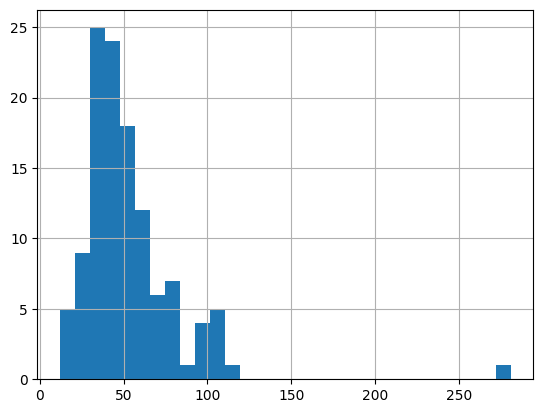

In [ ]:
seq_len = [len(sentence.split()) for sentence in sentences]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
# Calculate how many unique words
word_set = set()
for text in sentences:
  words = text.split()
  for word in words:
    if word not in word_set:
      word_set.add(word)

VOCAB_SIZE = len(word_set)
print(VOCAB_SIZE)

1408


In [ ]:
# Calculate the min length size, max length size, and the average length size
count_word = []
for text in sentences:
  words = text.split()
  count_word.append(len(words))

min(count_word), max(count_word), sum(count_word)/len(count_word)

(12, 281, 53.20338983050848)

### Tokenizer
We will use `Tokenizer` from Tensorflow (already imported above) to tokenize the texts

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'and': 3,
 'to': 4,
 'me': 5,
 'my': 6,
 'the': 7,
 'a': 8,
 'that': 9,
 'in': 10,
 'of': 11,
 'feel': 12,
 'for': 13,
 'it': 14,
 'is': 15,
 'they': 16,
 'them': 17,
 'have': 18,
 'with': 19,
 'was': 20,
 'day': 21,
 "i'm": 22,
 'on': 23,
 'so': 24,
 'am': 25,
 'myself': 26,
 'had': 27,
 'life': 28,
 'always': 29,
 'or': 30,
 'how': 31,
 'more': 32,
 'can': 33,
 'because': 34,
 'now': 35,
 'from': 36,
 'today': 37,
 'about': 38,
 'self': 39,
 'parents': 40,
 'after': 41,
 'at': 42,
 'really': 43,
 'very': 44,
 'like': 45,
 'much': 46,
 'their': 47,
 'love': 48,
 'what': 49,
 'are': 50,
 'care': 51,
 'by': 52,
 'every': 53,
 'everyone': 54,
 'want': 55,
 'made': 56,
 'not': 57,
 'when': 58,
 'school': 59,
 'people': 60,
 'everything': 61,
 'feeling': 62,
 'do': 63,
 'friends': 64,
 'out': 65,
 'who': 66,
 'don’t': 67,
 'only': 68,
 'up': 69,
 'all': 70,
 'alone': 71,
 'but': 72,
 'family': 73,
 'as': 74,
 'know': 75,
 'will': 76,
 'there': 77,
 'since': 78,
 "don

Because, there would be texts with different length $→$ we have to perform padding on both train dataset and test dataset

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating="post", padding="post")
print(padded_train_sequences.shape)
padded_train_sequences

(94, 200)


array([[  2, 137,  14, ...,   0,   0,   0],
       [ 78,   6, 128, ...,   0,   0,   0],
       [  6, 161, 203, ...,   0,   0,   0],
       ...,
       [506,  62, 849, ...,   0,   0,   0],
       [  7, 103,  21, ...,   0,   0,   0],
       [  2, 125,  22, ...,   0,   0,   0]], dtype=int32)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating="post", padding="post")
print(padded_test_sequences.shape)
padded_test_sequences

(24, 200)


array([[ 41, 697,   8, ...,   0,   0,   0],
       [107,  29, 394, ...,   0,   0,   0],
       [  6, 100,   3, ...,   0,   0,   0],
       ...,
       [107,  29,  27, ...,   0,   0,   0],
       [356,  19,  40, ...,   0,   0,   0],
       [  6, 222,  50, ...,   0,   0,   0]], dtype=int32)

## Build and train the Neural Network

### Task 1: Classifying 3 Emotion Categories

In [ ]:
# One hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((94, 3), (24, 3))

In [ ]:
# use Sequential model from Tensorflow

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(16, activation="relu"),
    Dense(3, activation="softmax"),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 64)           640000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 748,355
Trainable params: 748,355
Non-tr

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(padded_train_sequences, y_train, epochs=20, validation_data=(padded_test_sequences, y_test))

Epoch 1/20
3/3 [==============================] - 13s 2s/step - loss: 1.0992 - accuracy: 0.3936 - val_loss: 1.0876 - val_accuracy: 0.4583
Epoch 2/20
3/3 [==============================] - 1s 499ms/step - loss: 1.0781 - accuracy: 0.4894 - val_loss: 1.0644 - val_accuracy: 0.4583
Epoch 3/20
3/3 [==============================] - 2s 711ms/step - loss: 1.0508 - accuracy: 0.5000 - val_loss: 1.0296 - val_accuracy: 0.3750
Epoch 4/20
3/3 [==============================] - 2s 760ms/step - loss: 1.0040 - accuracy: 0.4468 - val_loss: 0.9767 - val_accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 1s 510ms/step - loss: 0.9356 - accuracy: 0.7660 - val_loss: 0.8899 - val_accuracy: 0.9167
Epoch 6/20
3/3 [==============================] - 1s 482ms/step - loss: 0.8343 - accuracy: 0.6596 - val_loss: 0.7985 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 1s 464ms/step - loss: 0.7548 - accuracy: 0.5745 - val_loss: 0.7659 - val_accuracy: 0.5833
Epoch 8/20
3/3 [======

The  intial  architecture
with LSTM is rather light-weight and simple, but
still acquire the best performance (converge after
20 epochs

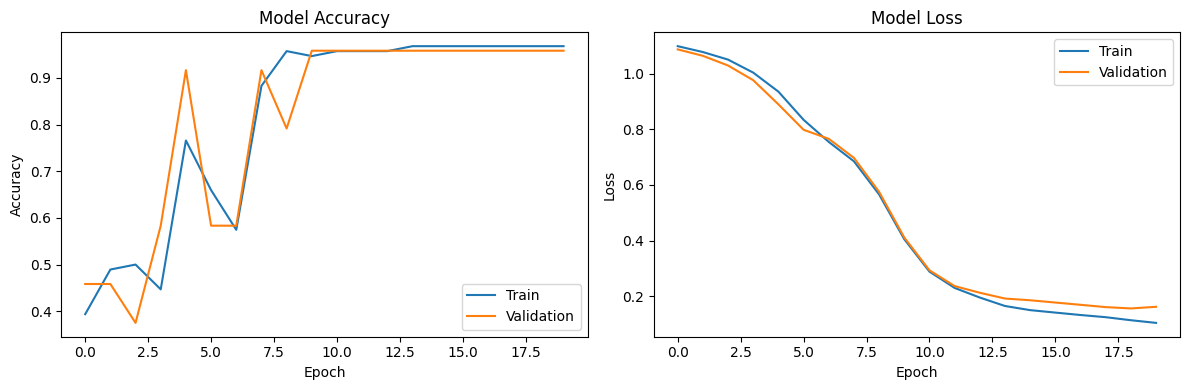

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy subplot
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot the loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# save model for task 1
model.save('model_3_classes_v1.1.h5')
model.save_weights('model_3_classes_weights_v1.1')

In [ ]:
# re-import the model to check and do inference
# If you do not use Google Colab, replace the path to model below to your local one
my_model = tf.keras.models.load_model('/content/model_3_classes_v1.h5')

In [ ]:
# inference
infer_text = ["I feel deeply disappointed today because my parents scolded me too much. They do not understand me. Very downmood to know that they only judge me on my scores. What a despondent life"]

text_seq = tokenizer.texts_to_sequences(infer_text)
padded_text_seq = pad_sequences(text_seq, maxlen=max_length, truncating="post", padding="post")
padded_text_seq

array([[  2,  12,   1,   1,  37,  34,   6,  40,   1,   5, 462,  46,  16,
         63,  57, 339,   5,  44, 830,   4,  75,   9,  16,  68, 337,   5,
         23,   6, 703,  49,   8, 454,  28,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
prediction = np.argmax(model.predict(padded_text_seq))
print(classes_2[prediction])

1/1 [==============================] - 0s 215ms/step
negative emotions


### Task 2: Classifying 12 Emotion Categories

The below code is the same as above (preprocessing texts), so run it quickly

In [ ]:
from sklearn.model_selection import train_test_split

sentences, labels = df["text"].values, df["index_label"].values

x_train, x_test, y_train_2, y_test_2 = train_test_split(
    sentences,
    labels,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=labels
)

print("Train Set")
print(x_train.shape, y_train_2.shape)
print("Test Set")
print(x_test.shape, y_test_2.shape)

Train Set
(94,) (94,)
Test Set
(24,) (24,)


In [ ]:
y_train_2 = to_categorical(y_train_2)
y_test_2 = to_categorical(y_test_2)
y_train_2.shape, y_test_2.shape

((94, 12), (24, 12))

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating="post", padding="post")
print(padded_train_sequences.shape)
padded_train_sequences

(94, 200)


array([[105,  21,   2, ...,   0,   0,   0],
       [  2, 550,  97, ...,   0,   0,   0],
       [  6, 161, 264, ...,   0,   0,   0],
       ...,
       [  2,  27,  83, ...,   0,   0,   0],
       [ 22, 115, 465, ...,   0,   0,   0],
       [107,  29,  27, ...,   0,   0,   0]], dtype=int32)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating="post", padding="post")
print(padded_test_sequences.shape)
padded_test_sequences

(24, 200)


array([[ 37,  41, 159, ...,   0,   0,   0],
       [  2,  12,  24, ...,   0,   0,   0],
       [ 34,  11,   7, ...,   0,   0,   0],
       ...,
       [  2,  79, 125, ...,   0,   0,   0],
       [  2,  27,   8, ...,   0,   0,   0],
       [338, 309,  18, ...,   0,   0,   0]], dtype=int32)

However,  the  above  architecture  does  not perform  well  with  the  problem  of  12-class classification.  We  need  a  more  complex architecture with more layers to capture the slight nuances  of  emotions  in  texts.  Accordingly,  we choose to implement this architecture

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential

dropout_threshold = 0.4
input_dim = vocab_size
output_dim = embedding_dim
input_length = max_length

model_2 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=output_dim, dropout=dropout_threshold, return_sequences=True), merge_mode="concat"),
    Bidirectional(LSTM(units=output_dim, return_sequences=True)),
    GlobalAveragePooling1D(),
    Dense(500, activation="relu"),
    Dropout(0.1),
    Dense(200, activation="relu"),
    Dropout(0.1),
    Dense(100, activation="relu"),
    Dropout(0.1),
    Dense(50, activation="relu"),
    Dense(12, activation="softmax"),
])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 64)           640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_8 (Dense)             (None, 500)               64500     
                                                      

In [ ]:
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_2 = model_2.fit(padded_train_sequences, y_train_2, epochs=100, validation_data=(padded_test_sequences, y_test_2))

Epoch 1/100
3/3 [==============================] - 13s 1s/step - loss: 2.4850 - accuracy: 0.0638 - val_loss: 2.4820 - val_accuracy: 0.1250
Epoch 2/100
3/3 [==============================] - 2s 584ms/step - loss: 2.4814 - accuracy: 0.0957 - val_loss: 2.4773 - val_accuracy: 0.0833
Epoch 3/100
3/3 [==============================] - 2s 585ms/step - loss: 2.4752 - accuracy: 0.1170 - val_loss: 2.4703 - val_accuracy: 0.0417
Epoch 4/100
3/3 [==============================] - 2s 571ms/step - loss: 2.4610 - accuracy: 0.0851 - val_loss: 2.4628 - val_accuracy: 0.1250
Epoch 5/100
3/3 [==============================] - 2s 747ms/step - loss: 2.4521 - accuracy: 0.1170 - val_loss: 2.4696 - val_accuracy: 0.1250
Epoch 6/100
3/3 [==============================] - 3s 849ms/step - loss: 2.4504 - accuracy: 0.1383 - val_loss: 2.4574 - val_accuracy: 0.1250
Epoch 7/100
3/3 [==============================] - 2s 584ms/step - loss: 2.4521 - accuracy: 0.1064 - val_loss: 2.4497 - val_accuracy: 0.1250
Epoch 8/100
3/3

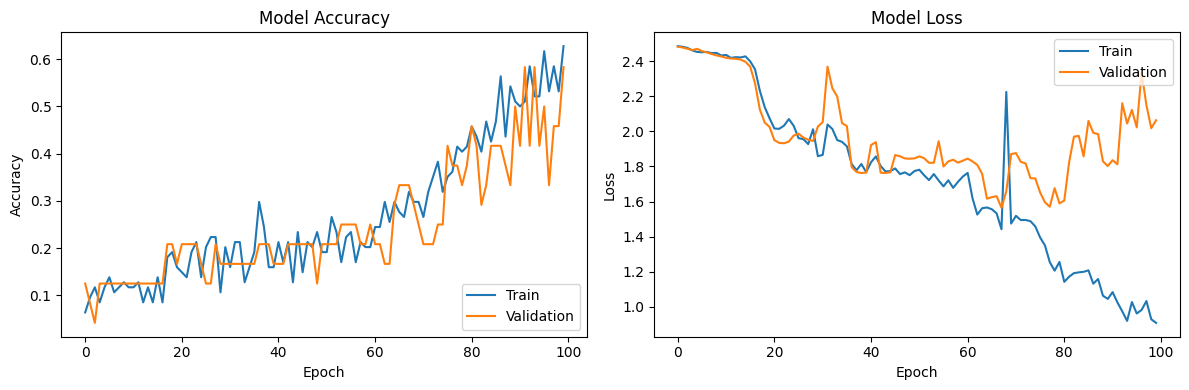

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy subplot
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Train')
plt.plot(history_2.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot the loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Show the plots
plt.show()

The performance of model is not good: accuracy on  both  train  set  and validation  set  fluctuates throughout 100 epochs. Furthermore, the loss on validation  set  starts  increasing  at  epoch  80, showing the sign of overfiting. This means this model with above architecture can not be continously trained.

### Transfer learning with BERT model

Due  to  above  obstacles,  I decide  to  use  a pretrained model and add to it with more layers with a hope that the large-scale pretrained BERT from Tensorflow can solve our problems.

The input for BERT is texts, so we do not need to rerun the preprocessing text.

If the you can not import tensorflow_hub and tensorflow_text even after run pip install. Try these two lines with specific versions to avoid conflict.



```
!pip install tensorflow-hub==0.12.0
!pip install -U tensorflow-text==2.12.1
```



In [ ]:
!pip install tensorflow-hub

In [ ]:
!pip install tensorflow_text

In [ ]:
import tensorflow_text as text
import tensorflow_hub as hub

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/2', trainable=False, name='BERT_encoder')
  outputs = encoder(encoder_inputs)

  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(400, activation='relu')(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(200, activation='relu')(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(100, activation='relu')(net)
  net = tf.keras.layers.Dropout(0,1)(net)
  net = tf.keras.layers.Dense(50, activation='relu')(net)
  net = tf.keras.layers.Dropout(0,1)(net)
  net = tf.keras.layers.Dense(30, activation='relu')(net)
  net = tf.keras.layers.Dropout(0,1)(net)
  net = tf.keras.layers.Dense(12, activation='softmax', name='classifier')(net)
  return tf.keras.Model(inputs=text_input, outputs=net)

classifier_model = build_classifier_model()
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((94, 12), (24, 12))

In [ ]:
classifier_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_3 = classifier_model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
3/3 [==============================] - 30s 7s/step - loss: 2.4733 - accuracy: 0.1277 - val_loss: 2.4038 - val_accuracy: 0.2500
Epoch 2/40
3/3 [==============================] - 20s 8s/step - loss: 2.4213 - accuracy: 0.1702 - val_loss: 2.3562 - val_accuracy: 0.2500
Epoch 3/40
3/3 [==============================] - 20s 7s/step - loss: 2.3395 - accuracy: 0.2021 - val_loss: 2.2807 - val_accuracy: 0.2083
Epoch 4/40
3/3 [==============================] - 19s 7s/step - loss: 2.2741 - accuracy: 0.2447 - val_loss: 2.2373 - val_accuracy: 0.3750
Epoch 5/40
3/3 [==============================] - 19s 7s/step - loss: 2.1457 - accuracy: 0.3830 - val_loss: 2.1001 - val_accuracy: 0.2917
Epoch 6/40
3/3 [==============================] - 18s 7s/step - loss: 2.0668 - accuracy: 0.3511 - val_loss: 2.0202 - val_accuracy: 0.2917
Epoch 7/40
3/3 [==============================] - 20s 8s/step - loss: 1.9425 - accuracy: 0.4043 - val_loss: 1.9435 - val_accuracy: 0.3333
Epoch 8/40
3/3 [==================

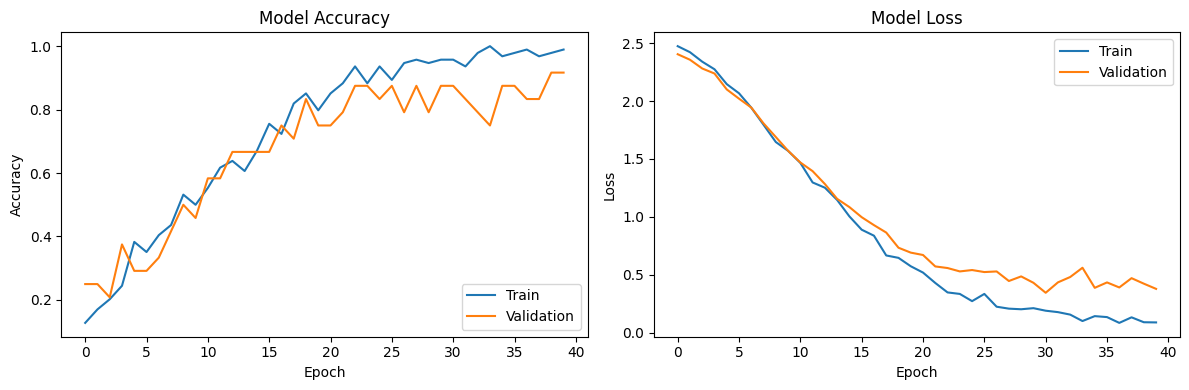

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy subplot
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Train')
plt.plot(history_3.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot the loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Show the plots
plt.show()

We stop early at epoch 40 when validation loss
stops declining to prevent overfitting. However,
at epoch 40, the accuracy on train and validation
set is over 90%, which is really good.

In [36]:
classifier_model.save('BERT_model_12_classes_v1.1.h5')
classifier_model.save_weights('BERT_model_12_classes_weights_v1.1')

#### Inference

In [ ]:
infer_text = [
    "1 I'm so despondent right now. I got bullied by some classmates, even though I was nice and friendly. They spread rumors and made fun of me. They hurt my feelings and my reputation. I felt humiliated and sad. I miss the respect and the friendship I had. I think I’m kind and good. I want to stand up for myself and find true friends.",
    "0 I'm so enraged and frustrated right now. My dad and I got into a disagreement about my grades. They don't understand how difficult my studies are or how much strain I am under. They don't care about me; they only care about the stats. They make me feel inferior by making comparisons to other youngsters. They shout at me and chastise me for falling short of their standards. I'm not respected or encouraged by them. So upsetting",
    "10 Dear diary, today I faced a difficult challenge in my math class. I was nervous and unsure of myself, but I decided to give it my best shot. I worked hard and solved the problem. I felt a sense of accomplishment and confidence. I realized that I can overcome any obstacle with a positive attitude and perseverance",
    "5 After school, I went home and locked myself in my room. I didn't want to talk to anyone, not even my parents or my friends. They wouldn't understand anyway. They would just tell me to cheer up, to snap out of it, to get over it. They don't know how hard it is to fight this darkness inside me.",
    "4 I sometimes feel so miserable inside that I want to terminate my life. Suicidal thoughts intensify and multiply in frequency. I think my self-loathing is one of the causes of my melancholy, even though I've only attempted it a few of times.",
]

infer_text

["1 I'm so despondent right now. I got bullied by some classmates, even though I was nice and friendly. They spread rumors and made fun of me. They hurt my feelings and my reputation. I felt humiliated and sad. I miss the respect and the friendship I had. I think I’m kind and good. I want to stand up for myself and find true friends.",
 "0 I'm so enraged and frustrated right now. My dad and I got into a disagreement about my grades. They don't understand how difficult my studies are or how much strain I am under. They don't care about me; they only care about the stats. They make me feel inferior by making comparisons to other youngsters. They shout at me and chastise me for falling short of their standards. I'm not respected or encouraged by them. So upsetting",
 '10 Dear diary, today I faced a difficult challenge in my math class. I was nervous and unsure of myself, but I decided to give it my best shot. I worked hard and solved the problem. I felt a sense of accomplishment and confi

In [ ]:
validation_label = []
for text in infer_text:
  text = text.split()
  validation_label.append(int(text[0]))

pattern = re.compile(r"\d+\s")

new_texts = []
for text in infer_text:
  new_text = pattern.sub("", text)
  new_texts.append(new_text)

validation_dataset = pd.DataFrame(new_texts)
validation_dataset = validation_dataset.rename(columns={0: "text"})

label = pd.DataFrame(validation_label)
label.columns = ["validation_label"]
validation_dataset = pd.concat([validation_dataset, label], axis=1)

validation_dataset.to_csv("validation_dataset.csv")
validation_dataset

,text,validation_label
0,I'm so despondent right now. I got bullied by ...,1
1,I'm so enraged and frustrated right now. My da...,0
2,"Dear diary, today I faced a difficult challeng...",10
3,"After school, I went home and locked myself in...",5
4,I sometimes feel so miserable inside that I wa...,4


In [ ]:
inference_prediction = []

for i in range(len(new_texts)):
  probabilities = classifier_model.predict([new_texts[i]])
  prediction = np.argmax(probabilities)
  inference_prediction.append(prediction)

1/1 [==============================] - 0s 201ms/step


In [ ]:
for ground_truth, text, index_label in zip(validation_label, new_texts, inference_prediction):
  print("-"*500)
  print(f"Emotion Predicted: {classes[index_label]} ------- True emotion label: {classes[ground_truth]}")
  print(f"Text: \n {text} \n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Emotion Predicted: sadness ------- True emotion label: sadness
Text: 
 I'm so despondent right now. I got bullied by some classmates, even though I was nice and friendly. They spread rumors and made fun of me. They hurt my feelings and my reputation. I felt humiliated and sad. I miss the respect and the friendship I had. I think I’m kind and good. I want to stand up for myself and find true friends. 

----------------------------------------------------------------------------------------------

# Mental Health Quality Assessment

We define a math formula to assess the mental health quality assessment for users based on some most trustworthy and popular mental health quality scale on the world such as DASS.

In a very simple idea, an adolescent with depression should be more concerned than the one who just only feel lonely or sadness. Therefore, we assign each category with a score number indicating how serious such emotion is. Then we calculate the temporary score is the mean of 3 classes with greatest probabilities. Remember that an input text is just one chat from user, but our user will continue to chat with the bot and maybe, at the end of chat, things will change: user may get more relieved or happy thanks to the help from chatbot. Due to such reason, it's not sensible to regard the mean score of all chat as the official score for user's mental health quality. Hence, we use $\gamma \in (0,1)$ as a regulator: the more recent the score, the more impactful it will be.


$$\hat{y}^i = \text{classifier_model.predict}([\text{chat}^i]) \space | \space \text{with} \space i =1...N$$
$$
\hat{y}^i_1, \hat{y}^i_2, \hat{y}^i_3 = \arg\max^3(y^i)
$$
$$
s_i = \frac{1}{3}\sum_{j=1}^3 f(classes[\hat{y}^i_j])
$$

$$
Q = \gamma^{N-1}*s_i + \gamma^{N-2}*s_{i+1} + ... + \gamma^{0}s_{N}
$$

$$
Q = \sum_{i=1}^N \gamma^{N-i} * s_i
$$


Explain my formula: $\hat{y}^i$ is the probability vector returned from the classifier_model with the input is the $i$-th chat of total $N$ chats from user in the conversation. Next, we take 3 greatest probabilties instead of just one. When we have the three indices, we can get the score of each with the mapping function $f$(e.g depression gets $1.2pts$, anger gets $1.5pts$, sadness gets $1.8pts$...) and then we get the mean of three $→$ we get $s_i$ (score of $i$-th chat). Now after user complete all $N$ chats with the bot, we calculate the final score value $Q$ (quality). $y^{N-1}$ means the value $s_i$ will be decreased, while the final value $s_N$ still remains the same.

In [4]:
df = pd.read_csv("/content/emotion_classification_dataset_v1.1.csv")
df.head()

,text,index_label,classes,trinary_classes,trinary_class_index
0,I feel very dejected today. I got a very low s...,1,sadness,Negative emotions,0
1,I feel so lonely today. I have no friends to t...,5,lonely,Negative emotions,0
2,I feel so angry and irritated today. I had a f...,0,anger,Negative emotions,0
3,I feel so hopeless today. I have no future or ...,3,fear,Negative emotions,0
4,I feel so guilty today. I did something terrib...,2,remorse,Negative emotions,0


In [39]:
classifier_model.save('my_model.h5', save_format='h5')

In [45]:
# re-import the model to check and do inference
# If you do not use Google Colab, replace the path to model below to your local one
Bert_model = tf.keras.models.load_model('/content/BERT_model_12_classes_v1.1.h5', custom_objects={'KerasLayer': hub.KerasLayer})

Mimick the chat with chatbot

In [128]:
Chats = [
    "",
    "I feel very dejected today. I got a very low score in my math exam, everybody in class made a joke on me. The rest of my day, I do not feel like doing anything, the sadness, the sorrow just seem to fill in me",
    "But when coming home (today has been really tough), my parents even depress me more, they scolded me, they made me more disheartened. I feel so hopeless",
    "it's kind of good. But I am rather confused whether their method coud be applied in my case. Anyway let me try",
    "Oh I have tried on that method. Things start getting positive. My parents can sympathize with me now. I feel really pleased and happy that they can understand me. Hopefully, everything can get better because I really want to be joyful at school. Anyway just maintain my optimistic outlook",
]

Bot_responses = [
    "Hello this is chatbot",
    "I’m sorry to hear that. It’s okay to feel sad and dejected after a bad experience. It’s important to remember that everyone makes mistakes and has bad days. You can try to focus on the things that you enjoy doing and that make you happy. You can also talk to someone you trust about how you’re feeling. Sometimes it helps to talk about your feelings with someone else. Would you like me to help you find some resources or activities that might help you feel better?",
    "I’m sorry to hear that. It can be tough when you don’t feel supported by your parents. It’s important to remember that their behavior is not your fault and that you deserve to be treated with kindness and respect. You might find it helpful to talk to someone you trust about how you’re feeling. Sometimes it helps to talk about your feelings with someone else. Here are some resources that might help you deal with unsympathetic parents: \
        4 Ways to Deal with Toxic Parents - This article from wikiHow provides some tips on how to deal with toxic parents. It suggests things like emotionally detaching from your parents, accepting that you cannot change them, and limiting what you tell them about yourself and your life.\
        Unsympathetic parent - This forum thread on Mental Health Forum has people sharing their experiences with unsympathetic parents and offering support and advice. \
        7 Signs of a Toxic Parent and How to Cope - This article from Cleveland Clinic lists some signs of toxic parenting and provides tips on how to cope with it. \
        I hope this helps!",
    "You’re welcome. I’m glad that you found the article helpful. Remember that it’s okay to take things one step at a time and that you don’t have to do everything at once. You can try out different strategies and see what works best for you. If you ever need someone to talk to, feel free to reach out to me.",
    "I’m glad to hear that things are getting better for you. It’s great that you’re feeling pleased and happy. I hope that tomorrow is a better day for you and that you can find joy at school. Remember that it’s okay to take things one step at a time and that you don’t have to do everything at once. If you ever need someone to talk to, feel free to reach out to me.",
]

In [129]:
print("*"*600)
for chat, bot_response in zip(Chats, Bot_responses):
  print(f"USER: \n {chat} \n")
  print(f"BOT: \n {bot_response} \n")
  print("*"*600)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
USER: 
  

BOT: 
 Hello this is chatbot 

*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [51]:
general_model = tf.keras.models.load_model('/content/model_3_classes_v1.1.h5')

In order to illustrate my math formula, Let analyse only $1$st chat from the conversation (chats)

In [134]:
# get the probabilties vector
y_1= classifier_model.predict([Chats[1]])
y_1

1/1 [==============================] - 0s 273ms/step


array([[3.4555662e-04, 9.9856430e-01, 7.3559880e-07, 2.0597981e-04,
        8.8090339e-04, 4.3760725e-08, 2.3656057e-07, 1.4270864e-10,
        1.6134159e-10, 2.4158144e-06, 2.2762212e-08, 1.1595465e-11]],
      dtype=float32)

In [135]:
# take 3 greatest probilities
y_1 = np.argsort(y_1)[0][-3:]
y_1

array([0, 4, 1])

The scale is $\in (1, 5)$ ranging from **VERY BAD TO VERY GOOD**

- **DEPRESSION**: I gave depression the lowest rating of `1.2` because it is a serious mental disorder that can impair one's functioning and quality of life. Depression can cause persistent sadness, hopelessness, low self-esteem, loss of interest, fatigue, insomnia, and suicidal thoughts.

- **ANGER**: I gave anger a low rating of `1.5` because it is a negative emotion that can cause harm to oneself and others. Anger can impair one's judgment, increase stress, and lead to aggression or violence.

- **SADNESS**: I gave sadness a slightly higher rating of `1.8` because it is also a negative emotion that can cause pain and suffering. Sadness can affect one's mood, motivation, and well-being. However, sadness can also have some positive effects, such as helping one cope with loss, empathize with others, or appreciate happiness.

- **LONELY**: I gave lonely a rating of `1.9` because it is a distressing emotion that can affect one's social and emotional needs. Lonely can cause isolation, alienation, and low self-worth. However, lonely can also encourage one to seek out social support, connect with others, or find meaning in solitude.

- **REMORSE**: I gave remorse a rating of `2.0` because it is a mixed emotion that can have both negative and positive aspects. Remorse can cause guilt, regret, and self-blame, but it can also motivate one to apologize, make amends, or learn from mistakes.
- **FEAR**: I gave fear a rating of `2.2` because it is another mixed emotion that can have both negative and positive aspects. Fear can cause anxiety, panic, and avoidance, but it can also protect one from danger, alert one to threats, or prepare one for action.

- **CONFUSTION**: I gave confusion a slightly above average rating of `2.5` because it is a neutral emotion that can indicate uncertainty or curiosity. Confusion can cause doubt, hesitation, and perplexity, but it can also stimulate learning, problem-solving, and exploration.

- **PRIDE**: I gave pride a moderately high rating of `4.2` because it is a complex emotion that can have both positive and negative aspects. Pride can cause self-esteem, achievement, and recognition, but it can also cause arrogance, conceit, and superiority.

- **OPTIMISM**: I gave optimism a high rating of `4.5` because it is a positive attitude that can influence one's outlook and behavior. Optimism can cause hopefulness, confidence, resilience, and motivation. Optimism can also help one cope with challenges, overcome obstacles, and achieve goals.

- **GRATITUDE**: I gave gratitude a high rating of `4.6` because it is a positive emotion that can foster appreciation and generosity. Gratitude can cause thankfulness, recognition, and reciprocity. Gratitude can also improve one's mood, relationships, and health.

- **JOY**: I gave joy the highest rating of `4.8` because it is a positive emotion that can enhance one's happiness and well-being. Joy can cause pleasure, satisfaction, gratitude, and optimism. Joy can also boost one's immune system, creativity, and productivity.

- **LOVE**: I gave love a very high rating of `4.9` because it is a positive emotion that can enrich one's relationships and personal growth. Love can cause affection, intimacy, trust, and compassion. Love can also improve one's physical and mental health, reduce stress, and increase longevity.




The above assumption is based on theses resources:

: [Anger - Wikipedia](https://en.wikipedia.org/wiki/Anger)
: [Sadness - Wikipedia](https://en.wikipedia.org/wiki/Sadness)
: [The Surprising Benefits of Sadness | Psychology Today](https://www.psychologytoday.com/us/blog/the-squeaky-wheel/201603/the-surprising-benefits-sadness)
: [Remorse - Wikipedia](https://en.wikipedia.org/wiki/Remorse)
: [The Benefits of Remorse | Psychology Today](https://www.psychologytoday.com/us/blog/fulfillment-any-age/201507/the-benefits-remorse)
: [Fear - Wikipedia](https://en.wikipedia.org/wiki/Fear)
: [The Benefits of Fear | Psychology Today](https://www.psychologytoday.com/us/blog/finding-purpose/201807/the-benefits-fear)
: [Depression (mood) - Wikipedia](https://en.wikipedia.org/wiki/Depression_(mood))
: [Loneliness - Wikipedia](https://en.wikipedia.org/wiki/Loneliness)
: [The Benefits of Loneliness | Psychology Today](https://www.psychologytoday.com/us/blog/the-science-success/201107/the-benefits-loneliness)
: [Joy - Wikipedia](https://en.wikipedia.org/wiki/Joy)
: [The Benefits of Joy | Psychology Today](https://www.psychologytoday.com/us/blog/your-emotional-meter/201708/the-benefits-joy)
: [Love - Wikipedia](https://en.wikipedia.org/wiki/Love)
: [The Benefits of Love | Psychology Today](https://www.psychologytoday.com/us/blog/the-athletes-way/201402/the-benefits-love)
: [Optimism - Wikipedia](https://en.wikipedia.org/wiki/Optimism)
: [The Benefits of Optimism | Psychology Today](https://www.psychologytoday.com/us/blog/the-mindful-self-express/201108/the-benefits-optimism)
: [Gratitude - Wikipedia](https://en.wikipedia.org/wiki/Gratitude)
: [The Benefits of Gratitude | Psychology Today](https://www.psychologytoday.com/us/blog/what-mentally-strong-people-dont-do/201504/7-scientifically-proven-benefits-gratitude)
: [Pride - Wikipedia](https://en.wikipedia.org/wiki/Pride)
: [The Dark Side of Pride | Psychology Today](https://www.psychologytoday.com/us/blog/hide-and-seek/201509/the-dark-side-pride)
: [Confusion - Wikipedia](https://en.wikipedia.org/wiki/Confusion)
: [The Benefits of Confusion | Psychology Today](https://www.psychologytoday.com/us/blog/making-change/201405/the-benefits-confusion)

In [65]:
f = [1.5,      1.8,       2.0,     2.2,        1.2,        1.9,    4.8,   4.9,      4.5,         4.6,       4.2,      2.5]
# ["anger", "sadness", "remorse", "fear", "depression", "lonely", "joy", "love", "optimism", "gratitude", "pride", "confusion"]

In [136]:
# Look at the f function in the math formula -> get the score
print(Chats[2])
for y_1j in y_1:
  print(classes[y_1j], f[y_1j])

But when coming home (today has been really tough), my parents even depress me more, they scolded me, they made me more disheartened. I feel so hopeless
anger 1.5
depression 1.2
sadness 1.8


In [137]:
# Calculate the mean of 3 scores
mean_score_chat_1 = 0
for y_1j in y_1:
  mean_score_chat_1 += y_1j

mean_score_chat_1/=3
mean_score_chat_1

1.6666666666666667

Now lets combine into function loop to do the same with all chats in the conversation


In [138]:
mean_score_chat = [0]

for i in range(1, len(Chats)):
  y_i= classifier_model.predict([Chats[i]])
  y_i = np.argsort(y_i)[0][-3:]

  mean_score_chat_i = 0
  for j in range(len(y_i)):
    mean_score_chat_i += y_i[j]

  mean_score_chat_i /= 3
  mean_score_chat.append(mean_score_chat_i)

print(mean_score_chat)

# mean_score_chat_i = s_i in the math formula

1/1 [==============================] - 0s 311ms/step
[0, 1.6666666666666667, 1.0, 2.6666666666666665, 5.666666666666667]


As you can see, now our user starts feel more positive thanks to the help from chatbot. So we will calculate the score of mental health quality for this chat/personal story/diary in that day. The more recent the feeling, the more important it is, so we use $\gamma$ (gamma) to regularize this policy.

In [145]:
gamma = 0.9
N = len(Chats) - 1
Q = 0

for i in range(1, N+1):
  Q = Q + gamma**(N - i) * mean_score_chat[i]
Q /= N
Q

2.522916666666667

In [142]:
(1.6666666666666667 * 0.9**3 + 1.0 * 0.9**2 + 2.6666666666666665 * 0.9**1 + 5.666666666666667 * 0.9**0)/4

2.522916666666667

So, we can conlude that: Although at first chat, user felt really depressed and sad, user still get better throughout the chat thanks to the help of chat bot. The final score is **2.52**, which is normal. We then use this score to monitor user's mental health quality day after day, month after month